**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = int(n_neighbors)
        self.algorithm = algorithm

    def fit(self, X, y):
        self._fit_y = np.array(y)
        self._class_y = np.unique(y)
        self._fit_X = np.array(X)
        if self.algorithm == 'kd_tree':
            self._KDtree_fit = KDTree(self._fit_X)
        return self

    def predict(self, X):
        return np.array([np.bincount(i).argmax()
                         for i in self.metrica(X)]).astype('int')

    def predict_proba(self, X):
        return np.array([(np.bincount(i, minlength=self._class_y.size)
                          / (self.n_neighbors)).tolist()
                         for i in self.metrica(X)]).astype('float')

    def metrica(self, X):
        if self.algorithm == 'brute':
            metric = pairwise_distances(X, self._fit_X)
            m_ind = metric.argpartition(self.n_neighbors)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            _, m_ind = self._KDtree_fit.query(X, k=self.n_neighbors)
        Y_ind = [[y_train[j] for j in i] for i in m_ind]
        return Y_ind

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    # return np.average(y == self.predict(X))

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 1e+03 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

Wall time: 18 ms


array([2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2])

In [9]:
%time my_clf.predict(X_test)

Wall time: 4 ms


array([2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 2 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 2 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:
scores = np.zeros(30)
for i in range(0, 30):
    mean_score = np.zeros(1001)
    for j in range(0, 1000):
        X_train, X_test, y_train, y_test = (
            train_test_split(
                iris.data, iris.target, test_size=0.1, stratify=iris.target))
        my_clf = MyKNeighborsClassifier(n_neighbors=(i+1))
        my_clf.fit(X_train, y_train)
        my_clf.predict(X_test)
        mean_score[j] = my_clf.score(X_test, y_test)
    scores[i] = np.mean(mean_score)
best_n = scores.argmax(axis=0)+1

In [15]:
best_n

17

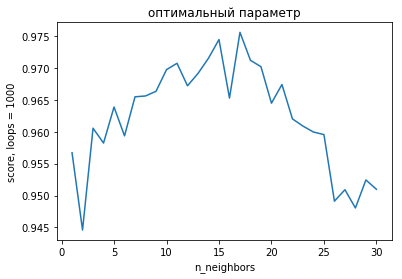

In [16]:
plt.plot(range(1,31), scores)
plt.xlabel("n_neighbors")
plt.ylabel("score, loops = {}".format(1000))
plt.title("оптимальный параметр")
plt.show()

**MNIST**

In [17]:
mnist = fetch_mldata('MNIST original')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [20]:
%time clf.fit(X_train, y_train)

Wall time: 3min


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 71 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [22]:
%time clf.predict(X_test)

Wall time: 2min 55s


array([8., 1., 6., 4., 0., 0., 0., 4., 8., 4., 1., 1., 8., 2., 9., 3., 2.,
       8., 1., 8., 2., 8., 9., 0., 5., 6., 4., 0., 1., 9., 8., 7., 0., 1.,
       3., 8., 5., 6., 2., 3., 3., 0., 7., 5., 0., 9., 3., 5., 2., 4., 8.,
       6., 6., 9., 3., 9., 8., 1., 0., 2., 4., 3., 9., 9., 6., 8., 1., 4.,
       0., 4., 2., 5., 8., 3., 1., 5., 4., 5., 7., 8., 9., 3., 1., 2., 3.,
       6., 1., 7., 0., 2., 8., 5., 8., 5., 8., 8., 0., 3., 5., 4., 8., 9.,
       9., 4., 9., 1., 2., 9., 8., 1., 5., 4., 4., 9., 1., 6., 2., 9., 6.,
       4., 0., 0., 9., 6., 3., 0., 7., 5., 6., 0., 9., 1., 4., 4., 7., 5.,
       4., 7., 2., 2., 0., 0., 9., 1., 6., 2., 1., 1., 1., 9., 2., 7., 5.,
       7., 2., 7., 5., 2., 5., 9., 5., 8., 7., 1., 7., 5., 1., 4., 5., 3.,
       6., 9., 6., 5., 6., 0., 4., 1., 2., 6., 7., 6., 6., 2., 3., 3., 9.,
       7., 3., 4., 6., 6., 2., 1., 8., 5., 3., 1., 9., 2., 1., 5., 9., 3.,
       7., 5., 6., 4., 1., 8., 1., 2., 7., 4., 0., 1., 8., 1., 7., 6., 7.,
       5., 3., 6., 4., 9.

In [23]:
%time my_clf.predict(X_test)

Wall time: 14.9 s


array([8, 1, 6, 4, 0, 0, 0, 4, 8, 4, 1, 1, 8, 2, 9, 3, 2, 8, 1, 8, 2, 8,
       9, 0, 5, 6, 4, 0, 1, 9, 8, 7, 0, 1, 3, 8, 5, 6, 2, 3, 3, 0, 7, 5,
       0, 9, 3, 5, 2, 4, 8, 6, 6, 9, 3, 9, 8, 1, 0, 2, 4, 3, 9, 9, 6, 8,
       1, 4, 0, 4, 2, 5, 8, 3, 1, 5, 4, 5, 7, 8, 9, 3, 1, 2, 3, 6, 1, 7,
       0, 2, 8, 5, 8, 5, 8, 8, 0, 3, 5, 4, 8, 9, 9, 4, 9, 1, 2, 9, 8, 1,
       5, 4, 4, 9, 1, 6, 2, 9, 6, 4, 0, 0, 9, 6, 3, 0, 7, 5, 6, 0, 9, 1,
       4, 4, 7, 5, 4, 7, 2, 2, 0, 0, 9, 1, 6, 2, 1, 1, 1, 9, 2, 7, 5, 7,
       2, 7, 5, 2, 5, 9, 5, 8, 7, 1, 7, 5, 1, 4, 5, 3, 6, 9, 6, 5, 6, 0,
       4, 1, 2, 6, 7, 6, 6, 2, 3, 3, 9, 7, 3, 4, 6, 6, 2, 1, 8, 5, 3, 1,
       9, 2, 1, 5, 9, 3, 7, 5, 6, 4, 1, 8, 1, 2, 7, 4, 0, 1, 8, 1, 7, 6,
       7, 5, 3, 6, 4, 9, 4, 7, 8, 0, 1, 7, 3, 9, 2, 9, 6, 8, 4, 1, 8, 0,
       3, 9, 3, 3, 4, 3, 2, 2, 7, 9, 3, 0, 3, 9, 6, 2, 3, 6, 1, 6, 4, 1,
       2, 3, 8, 1, 5, 3, 0, 5, 2, 6, 4, 4, 5, 9, 7, 8, 5, 7, 7, 6, 5, 3,
       9, 4, 1, 1, 0, 6, 4, 9, 5, 5, 4, 4, 2, 0, 4,

In [24]:
%time clf.predict_proba(X_test)

Wall time: 2min 55s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [25]:
%time my_clf.predict_proba(X_test)

Wall time: 8.97 s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [26]:
clf.score(X_test, y_test)

0.9728571428571429

In [27]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 3min 4s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 3min 8s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=17)

In [32]:
%time clf.predict(X_test)

Wall time: 3min


array([2., 8., 6., 9., 7., 5., 2., 7., 0., 2., 2., 9., 8., 4., 9., 5., 5.,
       8., 3., 1., 9., 9., 0., 7., 6., 5., 9., 1., 0., 0., 3., 1., 9., 0.,
       3., 2., 7., 3., 1., 8., 3., 2., 0., 5., 9., 5., 4., 0., 0., 5., 0.,
       6., 3., 1., 2., 2., 9., 6., 4., 3., 4., 1., 8., 5., 6., 9., 2., 0.,
       1., 8., 2., 4., 0., 7., 7., 6., 4., 4., 4., 6., 4., 9., 8., 4., 0.,
       6., 8., 9., 2., 8., 0., 3., 3., 0., 4., 2., 2., 2., 7., 7., 1., 8.,
       5., 3., 4., 7., 2., 9., 6., 3., 6., 0., 3., 0., 0., 4., 3., 7., 7.,
       2., 8., 7., 5., 6., 5., 0., 2., 6., 8., 1., 7., 1., 5., 8., 6., 4.,
       2., 6., 1., 4., 2., 1., 0., 9., 9., 6., 0., 4., 1., 1., 0., 1., 2.,
       8., 3., 5., 7., 8., 8., 0., 1., 5., 1., 8., 3., 7., 9., 1., 1., 9.,
       5., 4., 9., 3., 3., 7., 2., 8., 5., 4., 9., 1., 0., 6., 2., 6., 5.,
       9., 8., 8., 4., 9., 5., 8., 8., 3., 5., 6., 9., 4., 3., 8., 0., 2.,
       3., 6., 1., 0., 7., 0., 3., 8., 6., 2., 9., 2., 4., 1., 0., 5., 6.,
       1., 3., 7., 4., 3.

In [33]:
%time my_clf.predict(X_test)

Wall time: 2min 27s


array([2, 8, 6, 9, 7, 5, 2, 7, 0, 2, 2, 9, 8, 4, 9, 5, 5, 8, 3, 1, 9, 9,
       0, 7, 6, 5, 9, 1, 0, 0, 3, 1, 9, 0, 3, 2, 7, 3, 1, 8, 3, 2, 0, 5,
       9, 5, 4, 0, 0, 5, 0, 6, 3, 1, 2, 2, 9, 6, 4, 3, 4, 1, 8, 5, 6, 9,
       2, 0, 1, 8, 2, 4, 0, 7, 7, 6, 4, 4, 4, 6, 4, 9, 8, 4, 0, 6, 8, 9,
       2, 8, 0, 3, 3, 0, 4, 2, 2, 2, 7, 7, 1, 8, 5, 3, 4, 7, 2, 9, 6, 3,
       6, 0, 3, 0, 0, 4, 3, 7, 7, 2, 8, 7, 5, 6, 5, 0, 2, 6, 8, 1, 7, 1,
       5, 8, 6, 4, 2, 6, 1, 4, 2, 1, 0, 9, 9, 6, 0, 4, 1, 1, 0, 1, 2, 8,
       3, 5, 7, 8, 8, 0, 1, 5, 1, 8, 3, 7, 9, 1, 1, 9, 5, 4, 9, 3, 3, 7,
       2, 8, 5, 4, 9, 1, 0, 6, 2, 6, 5, 9, 8, 8, 4, 9, 5, 8, 8, 3, 5, 6,
       9, 4, 3, 8, 0, 2, 3, 6, 1, 0, 7, 0, 3, 8, 6, 2, 9, 2, 4, 1, 0, 5,
       6, 1, 3, 7, 4, 3, 0, 4, 7, 0, 9, 3, 8, 1, 1, 9, 1, 7, 9, 6, 9, 9,
       6, 6, 9, 7, 4, 7, 9, 5, 6, 9, 3, 2, 3, 7, 3, 5, 0, 8, 1, 8, 3, 9,
       2, 9, 2, 1, 4, 2, 7, 5, 9, 1, 6, 3, 6, 6, 2, 3, 2, 8, 6, 2, 0, 4,
       0, 7, 9, 6, 1, 7, 4, 7, 8, 8, 9, 7, 9, 0, 9,

In [34]:
%time clf.predict_proba(X_test)

Wall time: 3min 2s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 32s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
clf.score(X_test, y_test)

0.96

In [37]:
my_clf.score(X_test, y_test)

0.96

Задание 5

In [38]:
# seaborn 
'''
Библиотека базируется на Matplotlib, оптимизирована для визуализации статистических моделей 
'''
# matplotlib
'''
Низкоуровневая библиотека для визуализации 2d графики
'''
# train_test_split
'''
Библиотека для случайного разделения данных на тренировочный и тестовый наборы
'''
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
'''
Библиотека для последовательного преобразования исходного набора данных до окончательной оценки
'''
# StandardScaler (from sklearn.preprocessing import StandardScaler)
'''
Библиотека преобазует данных так, чтобы среднее значение было 0, а стандартное отклонение = 1
'''
# ClassifierMixin
'''
Класс является общим для всех классификаторов sklearn, содержит метод для получения среднего значения точности,
'''
# NeighborsBase
'''
Базовый класс для оценки методом ближайших соседей, содержит fit() и параметры весов
'''
# KNeighborsMixin
'''
Класс Mixin поиска k - ближайших соседей
'''
# SupervisedIntegerMixin
'''
Класс Mixin устанавливает модель обучения,
использующую данные "X" в качестве тренировочного набора,
а "y" - в качестве целевых значений  
'''

'\nКласс Mixin устанавливает модель обучения,\nиспользующую данные "X" в качестве тренировочного набора,\nа "y" - в качестве целевых значений  \n'